# Importing Libraries 

In [206]:
#data processing
import pandas as pd
import numpy as np

#Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#model evaluation and hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Reading Data

In [207]:
df=pd.read_csv('../input/parkinsons-disease-classification/pd_speech_features.csv',index_col=0, delimiter=',', skiprows=1)

In [208]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### Checking for Null Values

In [209]:
df.apply(lambda x: sum(x.isnull()),axis=0)

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [210]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


#### People who have disease

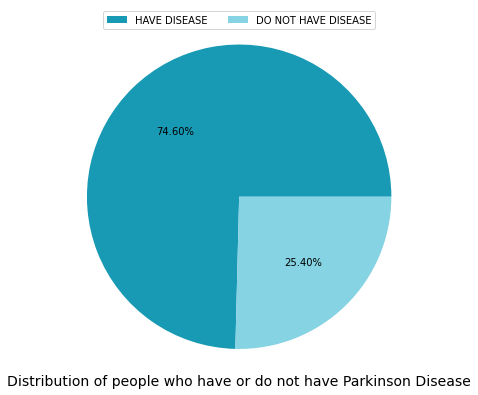

In [211]:
plt.figure(figsize = (7, 7))

labels = ['HAVE DISEASE', 'DO NOT HAVE DISEASE']
colors = ['#189AB4', '#86D3E3']
plt.pie(df['class'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of people who have or do not have Parkinson Disease', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

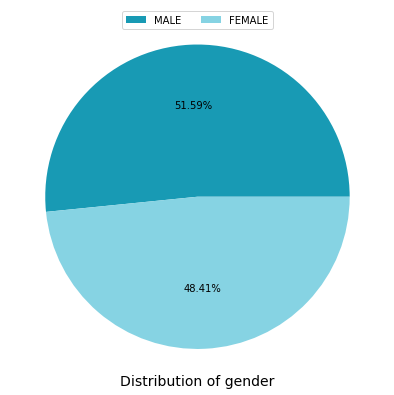

In [212]:
plt.figure(figsize = (7, 7))

labels = ['MALE', 'FEMALE']
colors = ['#189AB4', '#86D3E3']
plt.pie(df['gender'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of gender', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

# EXPLORATORY DATA ANALYSIS

## Handling Outliers

In [213]:
def outliers(data, n, specs):
    out_i=[]
    for col in specs:
        quar1=np.percentile(data[col],25)
        quar3=np.percentile(data[col],75)
        quar=quar3-quar1
        outlier_step = 1.5 * quar 
        outlier_list_col = data[(data[col] < quar1 - outlier_step) | (data[col] > quar3 + outlier_step)].index
        out_i.extend(outlier_list_col) 
    out_i = Counter(out_i)
    multiple_outliers = list(key for key, value in out_i.items() if value > n) 
    return multiple_outliers
outliers_to_drop = outliers(df, 2, ['PPE', 'DFA', 'RPDE', 'numPulses','locPctJitter'])
outliers_to_drop

[1,
 7,
 30,
 42,
 46,
 77,
 87,
 90,
 91,
 95,
 97,
 102,
 104,
 105,
 113,
 117,
 120,
 141,
 142,
 151,
 156,
 168,
 178,
 179,
 202,
 214,
 223,
 112]

In [214]:
print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))

Before: 756 rows
After: 672 rows


<AxesSubplot:>

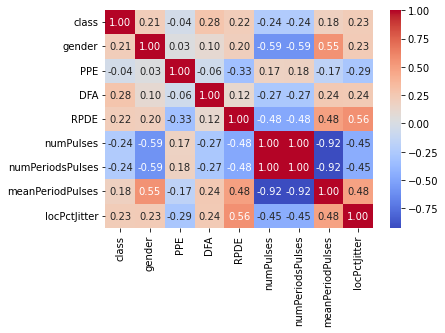

In [215]:
sns.heatmap(df[['class', 'gender', 'PPE', 'DFA', 'RPDE','numPulses','numPeriodsPulses','meanPeriodPulses','locPctJitter']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Skewness

## DFA

Text(0.5, 1.0, 'DFA distribution')

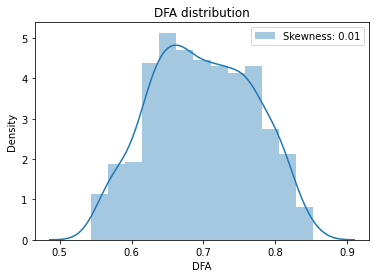

In [216]:
sns.distplot(df['DFA'], label = 'Skewness: %.2f'%(df['DFA'].skew()))
plt.legend(loc = 'best')
plt.title('DFA distribution')

Text(0.5, 1.0, 'Relation of DFA and disease')

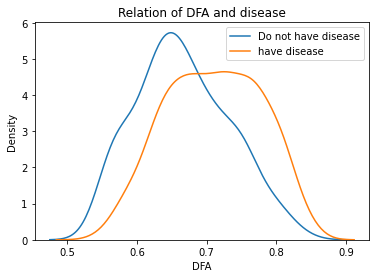

In [217]:
sns.kdeplot(df['DFA'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['DFA'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('DFA')
plt.title('Relation of DFA and disease')

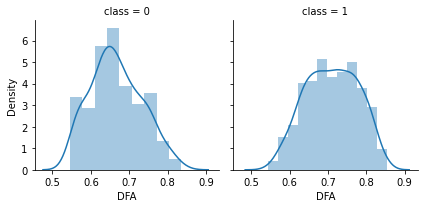

In [218]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'DFA')

# gender

Text(0.5, 1.0, 'gender distribution')

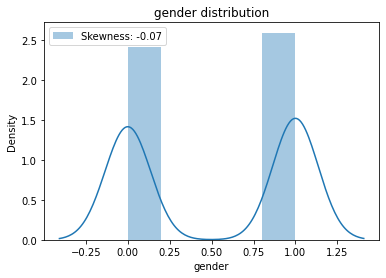

In [219]:
sns.distplot(df['gender'], label = 'Skewness: %.2f'%(df['gender'].skew()))
plt.legend(loc = 'best')
plt.title('gender distribution')

Text(0.5, 1.0, 'Relation of gender and disease')

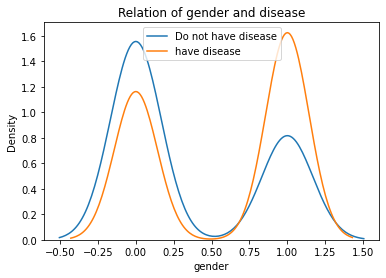

In [220]:
sns.kdeplot(df['gender'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['gender'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('gender')
plt.title('Relation of gender and disease')

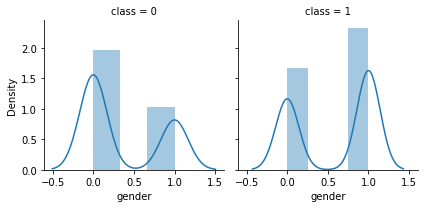

In [221]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'gender')

## RPDE

Text(0.5, 1.0, 'RPDE distribution')

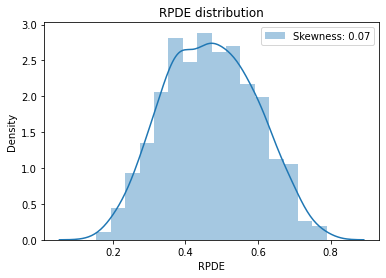

In [222]:
sns.distplot(df['RPDE'], label = 'Skewness: %.2f'%(df['RPDE'].skew()))
plt.legend(loc = 'best')
plt.title('RPDE distribution')

Text(0.5, 1.0, 'Relation of RPDE and disease')

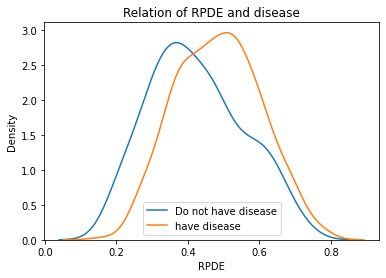

In [223]:
sns.kdeplot(df['RPDE'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['RPDE'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('RPDE')
plt.title('Relation of RPDE and disease')

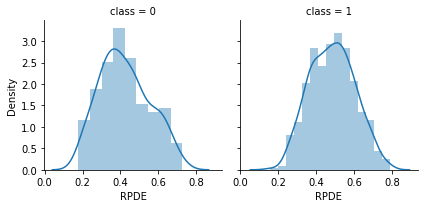

In [224]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'RPDE')

## numPulses

Text(0.5, 1.0, 'numPulses distribution')

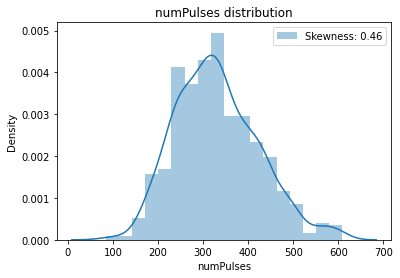

In [225]:
sns.distplot(df['numPulses'], label = 'Skewness: %.2f'%(df['numPulses'].skew()))
plt.legend(loc = 'best')
plt.title('numPulses distribution')

Text(0.5, 1.0, 'Relation of numPulses and disease')

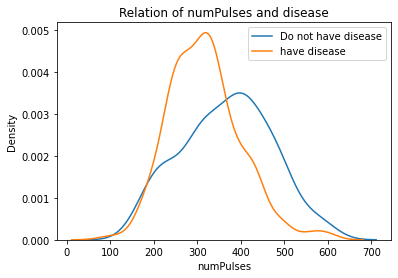

In [226]:
sns.kdeplot(df['numPulses'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['numPulses'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('numPulses')
plt.title('Relation of numPulses and disease')

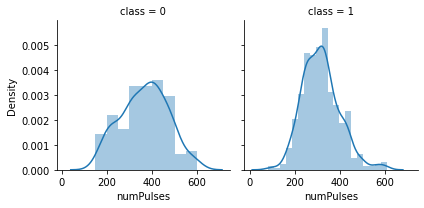

In [227]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'numPulses')

## numPeriodsPulses

Text(0.5, 1.0, 'numPeriodsPulses distribution')

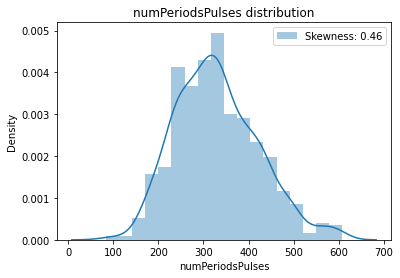

In [228]:
sns.distplot(df['numPeriodsPulses'], label = 'Skewness: %.2f'%(df['numPeriodsPulses'].skew()))
plt.legend(loc = 'best')
plt.title('numPeriodsPulses distribution')

Text(0.5, 1.0, 'Relation of numPeriodsPulses and disease')

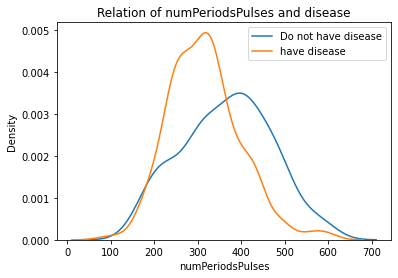

In [229]:
sns.kdeplot(df['numPeriodsPulses'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['numPeriodsPulses'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('numPeriodsPulses')
plt.title('Relation of numPeriodsPulses and disease')

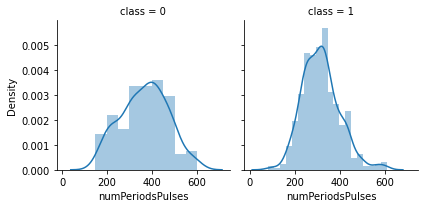

In [230]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'numPeriodsPulses')

## locPctJitter


Text(0.5, 1.0, 'locPctJitter distribution')

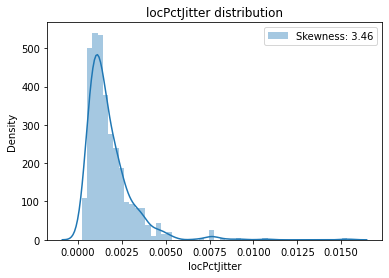

In [231]:
sns.distplot(df['locPctJitter'], label = 'Skewness: %.2f'%(df['locPctJitter'].skew()))
plt.legend(loc = 'best')
plt.title('locPctJitter distribution')

Text(0.5, 1.0, 'Relation of locPctJitter and disease')

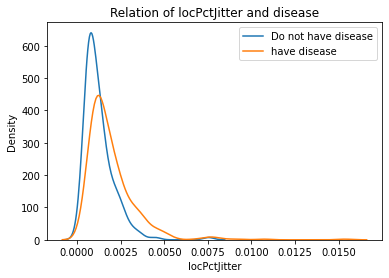

In [232]:
sns.kdeplot(df['locPctJitter'][df['class'] == 0], label = 'Do not have disease')
sns.kdeplot(df['locPctJitter'][df['class'] == 1], label = 'have disease')
plt.legend()
plt.xlabel('locPctJitter')
plt.title('Relation of locPctJitter and disease')

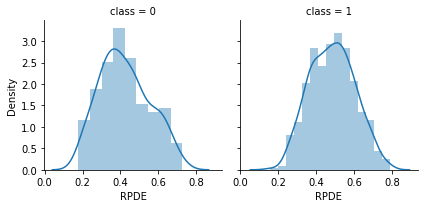

In [233]:
g = sns.FacetGrid(df, col = 'class')
g.map(sns.distplot, 'RPDE')

In [234]:
# Apply log transformation to locPctJitter column to reduce skewness

df['locPctJitter'] = df['locPctJitter'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'locPctJitter distribution')

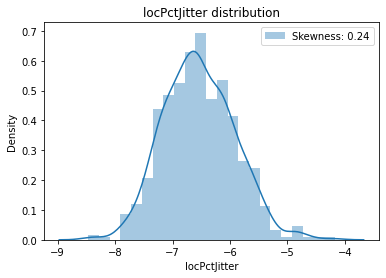

In [235]:
sns.distplot(df['locPctJitter'], label = 'Skewness: %.2f'%(df['locPctJitter'].skew()))
plt.legend(loc = 'best')
plt.title('locPctJitter distribution')

In [236]:
dataX=df.drop('class',axis=1)
dataY=df['class']

In [237]:
X_train,X_test,Y_train,Y_test=train_test_split(dataX,dataY,test_size=0.15,random_state=42)

In [238]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (571, 753)
X_test (101, 753)
Y_train (571,)
Y_test (101,)


In [239]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_y=lr.predict(X_test)
acc_lr=round(lr.score(X_train,Y_train)*100,2)
acc_lr

74.08

In [240]:
#SVM
svm =SVC()
svm.fit(X_train, Y_train)
pred_y= svm.predict(X_test)
acc_svm= round(svm.score(X_train, Y_train)*100,2)
acc_svm

74.78

In [241]:
#K-nearest neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
pred_y = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.21

In [242]:
#Gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, Y_train) * 100, 2)
acc_gnb

69.35

In [243]:
#Perceptron
percep = Perceptron()
percep.fit(X_train, Y_train)
pred_y = percep.predict(X_test)
acc_percep = round(percep.score(X_train, Y_train) * 100, 2)
acc_percep

27.32

In [244]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
pred_y = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

72.85

In [245]:
#Stochastic gradient descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
pred_y = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.68

In [246]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [247]:
#Random forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

# Accuracy Comparision

In [248]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svm, acc_knn, acc_lr, acc_random_forest, acc_gnb, acc_percep,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,100.00
1,Decision Tree,100.00
2,KNN,80.21
3,Support Vector Machines,74.78
4,Logistic Regression,74.08
5,Linear SVC,72.85
6,Stochastic Gradient Decent,72.68
7,Naive Bayes,69.35
8,Perceptron,27.32


# K fold Cross Validaton

In [249]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

len(classifiers)

9

In [250]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 9))

# Classifier cross validation

In [251]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [252]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.873980,0.027372,Random Forest
1,0.793293,0.052654,Decision Tree
2,0.740823,0.028659,Logistic Regression
3,0.737406,0.039017,Support Vector Machines
4,0.734155,0.053540,KNN
5,0.683063,0.053785,Gausian Naive Bayes
6,0.675678,0.143599,Perceptron
7,0.675678,0.143599,Stochastic Gradient Descent
8,0.620095,0.192660,Linear SVC


Text(0.5, 1.0, 'Cross Validation Scores')

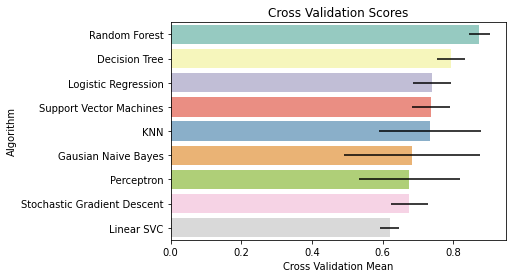

In [253]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [254]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [255]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 1)

In [256]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, Y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [257]:
print(rfr_random.best_params_)

{'n_estimators': 12, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [258]:
#Random forest
random_forest = RandomForestClassifier(n_estimators= 6, max_features= np.log(2), max_depth= 10, bootstrap=False)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.82

In [259]:
cross_val_score(random_forest, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8178765880217785

In [260]:
Y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [261]:
from sklearn import metrics


In [262]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.93      0.86      0.90        74

    accuracy                           0.85       101
   macro avg       0.81      0.84      0.82       101
weighted avg       0.86      0.85      0.86       101



## 

## 

## 